<a href="https://colab.research.google.com/github/Confidentrf/DeepLearning/blob/modules/singleLayerNuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
X = pd.read_csv('tree_class_feats.csv')
y = pd.read_csv('tree_class_target.csv')

# Print the sizes of the dataset
print("Number of Examples in the Dataset = ", X.shape[0])
print("Number of Features for each example = ", X.shape[1])
print("Possible Output Classes = ", np.unique(y))

Number of Examples in the Dataset =  10000
Number of Features for each example =  10
Possible Output Classes =  [0 1]


In [2]:
# Define your model as a Keras sequential model
from keras.models import Sequential
from tensorflow import random
random.set_seed(42)
np.random.seed(42)
model = Sequential()

In [3]:
# Add one hidden layer of size 10 with activation function of type tanh to your model
from keras.layers import Dense, Activation
model.add(Dense(10, activation='tanh', input_dim=X.shape[1]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Add another hidden layer, this time of size 5, with activation function of type tanh
model.add(Dense(5, activation='tanh'))

In [5]:
# Add the output layer with sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

In [6]:
# Choose the loss function to be binary cross entropy and the optimizer to be SGD for training the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171 (684.00 B)

 Trainable params: 171 (684.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train your model for 100 epochs and batch size equal to 5
history = model.fit(X, y, epochs=100, batch_size=5, verbose=1, validation_split=0.2, shuffle=False)

Epoch 1/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8206 - loss: 0.4161 - val_accuracy: 0.8645 - val_loss: 0.3235
Epoch 2/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8554 - loss: 0.3347 - val_accuracy: 0.8770 - val_loss: 0.2996
Epoch 3/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8685 - loss: 0.3076 - val_accuracy: 0.8815 - val_loss: 0.2798
Epoch 4/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8795 - loss: 0.2855 - val_accuracy: 0.8945 - val_loss: 0.2571
Epoch 5/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8874 - loss: 0.2637 - val_accuracy: 0.9045 - val_loss: 0.2343
Epoch 6/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8984 - loss: 0.2469 - val_accuracy: 0.9100 - val_loss: 0.2178
Epoch 7/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9014 - loss: 0.2362 - val_accuracy: 0.9145 - val_loss: 0.2058
Epoch 8/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9074 - loss: 0

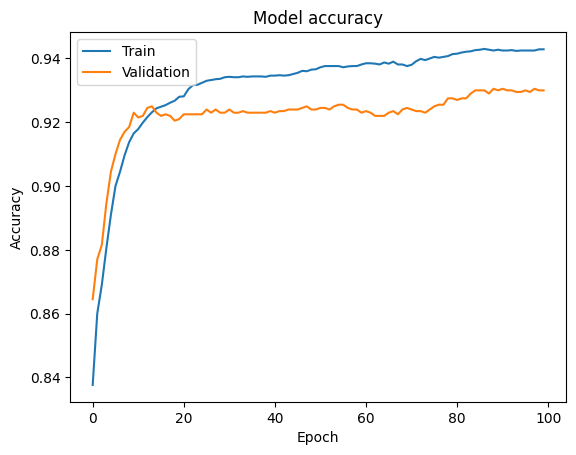

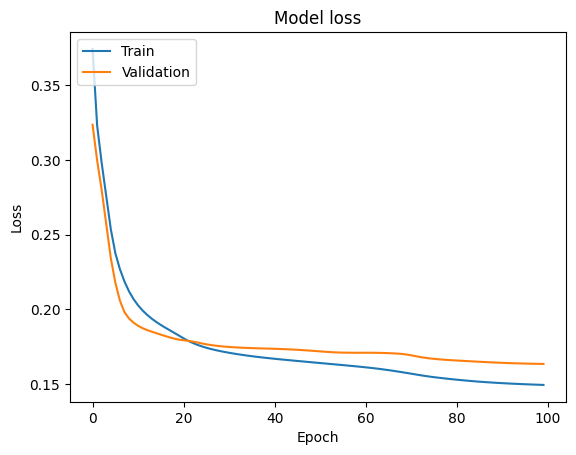

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [9]:
# Use your trained model to predict the output class for the first 10 input data examples
y_predicted = model.predict(X.iloc[0:10,:])

# print the predicted classes
print("Predicted probability for each of the examples belonging to class 1: "),
print(y_predicted)
print("Predicted class label for each of the examples: "),
print(np.round(y_predicted))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
Predicted probability for each of the examples belonging to class 1: 
[[5.1805109e-04]
 [3.3896998e-01]
 [1.0343613e-03]
 [9.7132450e-01]
 [9.7057950e-01]
 [2.4448207e-04]
 [8.1986773e-01]
 [1.6554837e-03]
 [1.0956884e-03]
 [9.9416673e-01]]
Predicted class label for each of the examples: 
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]]
